In [2]:
from tensorflow.keras.datasets import imdb
VOCAB_SIZE=10000
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=VOCAB_SIZE)
len(x_train), len(x_train)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


(25000, 25000)

In [3]:
x_train[0][:20],y_train[0]

([1,
  14,
  22,
  16,
  43,
  530,
  973,
  1622,
  1385,
  65,
  458,
  4468,
  66,
  3941,
  4,
  173,
  36,
  256,
  5,
  25],
 np.int64(1))

In [4]:
#padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_LEN=200
x_train=pad_sequences(x_train, maxlen=MAX_LEN, padding='post')
x_test=pad_sequences(x_test, maxlen=MAX_LEN, padding='post')
x_train.shape, x_test.shape

((25000, 200), (25000, 200))

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

EMBEDDING_DIM = 128

model = Sequential([
    Embedding(
        input_dim=VOCAB_SIZE,
        output_dim=EMBEDDING_DIM,
        input_length=MAX_LEN
    ),

    LSTM(128, return_sequences=False),
    Dropout(0.5),

    Dense(64, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
EPOCHS = 5
BATCH_SIZE = 64

history = model.fit(
    x_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2
)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.5201 - loss: 0.6883 - val_accuracy: 0.5962 - val_loss: 0.6323
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6441 - loss: 0.5986 - val_accuracy: 0.7384 - val_loss: 0.5285
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6870 - loss: 0.5653 - val_accuracy: 0.7980 - val_loss: 0.4803
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8050 - loss: 0.4639 - val_accuracy: 0.7718 - val_loss: 0.5320
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7855 - loss: 0.4561 - val_accuracy: 0.8078 - val_loss: 0.4875


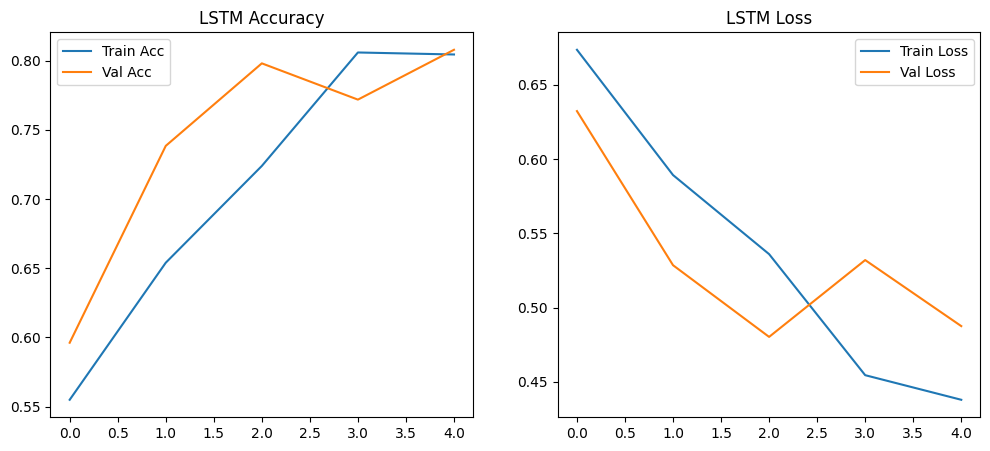

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("LSTM Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("LSTM Loss")

plt.show()


In [8]:
!pip install -q transformers datasets


In [9]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
     num_labels=2
)

word_index = imdb.get_word_index()
reverse_word_index = {v+3: k for k, v in word_index.items()}
reverse_word_index[0] = "<PAD>"
reverse_word_index[1] = "<START>"
reverse_word_index[2] = "<UNK>"

def decode_review(encoded_review):
    return " ".join([reverse_word_index.get(i, "?") for i in encoded_review])
texts_train = [decode_review(x) for x in x_train[:5000]]
labels_train = y_train[:5000]

texts_val = [decode_review(x) for x in x_test[:2000]]
labels_val = y_test[:2000]


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [10]:
train_encodings = tokenizer(
    texts_train,
    truncation=True,
    padding=True,
    max_length=128
)

val_encodings = tokenizer(
    texts_val,
    truncation=True,
    padding=True,
    max_length=128
)


In [11]:
#Train
class IMDBDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)
train_dataset = IMDBDataset(train_encodings, labels_train)
val_dataset = IMDBDataset(val_encodings, labels_val)


In [12]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy='epoch',
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    logging_steps=100,
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='eval_loss'
)

from sklearn.metrics import accuracy_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=1)
    return {'accuracy': accuracy_score(labels, preds)}


In [13]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

trainer.train()
trainer.evaluate()


/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice:

 4aa5a7b31781cde58f941074d29debc66747c3e1


wandb: WARNING Invalid choice
wandb: Enter your choice:

 1


wandb: You chose 'Create a W&B account'
wandb: Create an account here: https://wandb.ai/authorize?signup=true&ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: premchandsepeni (premchandsepeni-parul-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy
1,0.416400,0.371846,0.844500
2,0.280800,0.528117,0.851000


{'eval_loss': 0.37184643745422363,
 'eval_accuracy': 0.8445,
 'eval_runtime': 14.8372,
 'eval_samples_per_second': 134.797,
 'eval_steps_per_second': 16.85,
 'epoch': 2.0}

In [14]:
trainer.save_model("../models/bert_imdb_sentiment")
tokenizer.save_pretrained("../models/bert_imdb_sentiment")


('../models/bert_imdb_sentiment/tokenizer_config.json',
 '../models/bert_imdb_sentiment/special_tokens_map.json',
 '../models/bert_imdb_sentiment/vocab.txt',
 '../models/bert_imdb_sentiment/added_tokens.json')